## Car Insurance Prediction:

This is a dataset from one bank in the United States. Besides usual services, this bank also provides car insurance services. The bank organizes regular campaigns to attract new clients. The bank has potential customers’ data, and bank’s employees call them for advertising available car insurance options. We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome). You have data about 4000 customers who were contacted during the last campaign and for whom the results of campaign (did the customer buy insurance or not) are known.

Data Source: https://www.kaggle.com/kondla/carinsurance

In [35]:
import numpy as np 
import pandas as pd 
import os
import datetime
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier
import sys
import time
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [36]:
# Load train and test data
train = pd.read_csv("car_insurance_prediction/dataset/carInsurance_train.csv")
test = pd.read_csv("car_insurance_prediction/dataset/carInsurance_test.csv")

In [37]:
# copy the original dataset
df = train
df.head(5)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [38]:
# data set size and preliminary information about data
print("The shape of the dataset " + str(df.shape))
display(df.info())
display(df.describe())

The shape of the dataset (4000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 n

None

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [39]:
# missing values
print(df.apply(lambda x: sum(x.isnull()), axis=0))

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64


'Missing Values as a Percentage of Total Records'

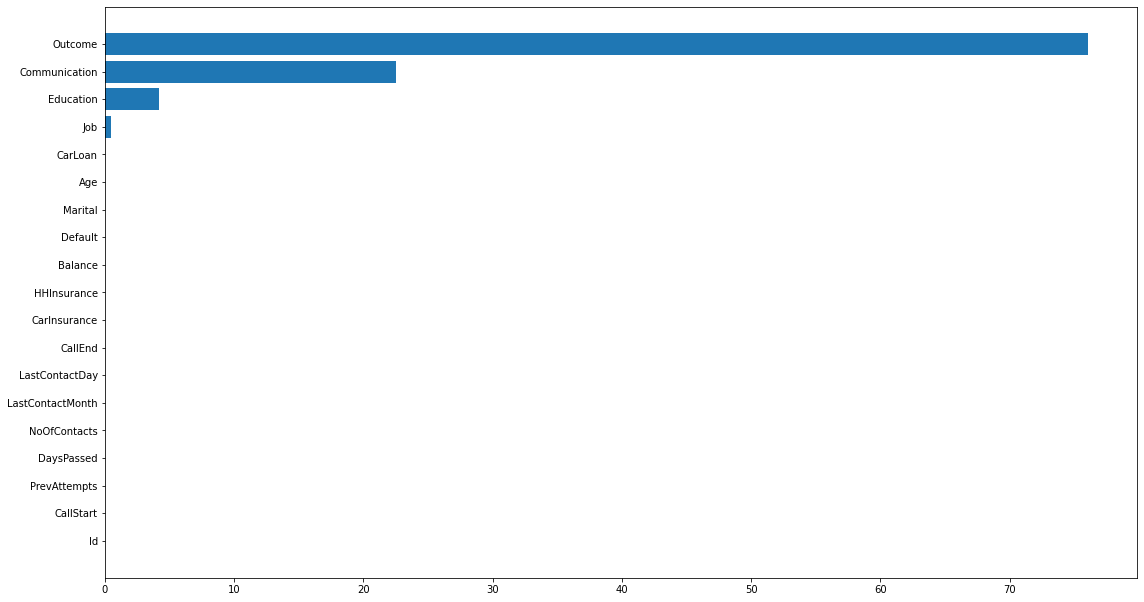

In [40]:
# missing values
display('Missing Values as a Percentage of Total Records')
# horizontal bar chart percentage
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
df_mv = pd.DataFrame({'columns':df.columns ,'mv_percent':df.isnull().sum()/len(df)*100})
df_mv.sort_values('mv_percent',inplace=True)
mv_barh = plt.barh(df_mv['columns'],width=df_mv['mv_percent']);
plt.show()

In [41]:
# check different unique values for each fetaure
category_names = df.columns
for category in category_names:
    print("There are %d unique values in %s." % (df[category].nunique(), category))

There are 4000 unique values in Id.
There are 70 unique values in Age.
There are 11 unique values in Job.
There are 3 unique values in Marital.
There are 3 unique values in Education.
There are 2 unique values in Default.
There are 2178 unique values in Balance.
There are 2 unique values in HHInsurance.
There are 2 unique values in CarLoan.
There are 2 unique values in Communication.
There are 31 unique values in LastContactDay.
There are 12 unique values in LastContactMonth.
There are 35 unique values in NoOfContacts.
There are 330 unique values in DaysPassed.
There are 20 unique values in PrevAttempts.
There are 3 unique values in Outcome.
There are 3777 unique values in CallStart.
There are 3764 unique values in CallEnd.
There are 2 unique values in CarInsurance.


Purchased car insurance : 1604
Not purchased car insurance: 2396


Text(0.5, 1.0, 'Distrinution of CarInsurance')

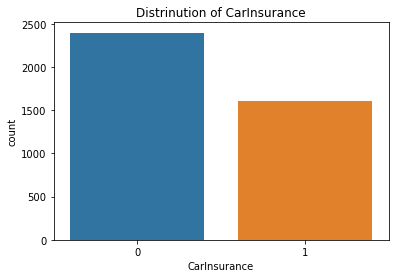

In [42]:
# distribution of target class
print("Purchased car insurance : {}".format(len(df[df['CarInsurance']==1])))
print("Not purchased car insurance: {}".format(len(df[df['CarInsurance']==0])))
sns.countplot(df['CarInsurance']).set_title('Distrinution of CarInsurance')

In [43]:
def feature_target_dist_plots(df, col_name):
    display('Effect of {} in buying car insurance: 0:NO , 1:YES'.format(col_name))
    fig = plt.figure()
    fig.set_size_inches(18.5, 18.5)
    ax = sns.countplot(x= df[col_name], hue = df['CarInsurance'], palette=["red", "Green"])
    plt.gca().set_title('Effect of {} in buying car insurance'.format(col_name), fontsize=16)
    plt.gca().set_xlabel(col_name,fontsize=16)
    plt.gca().set_ylabel("Count/Frequency",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

'Effect of Job in buying car insurance: 0:NO , 1:YES'

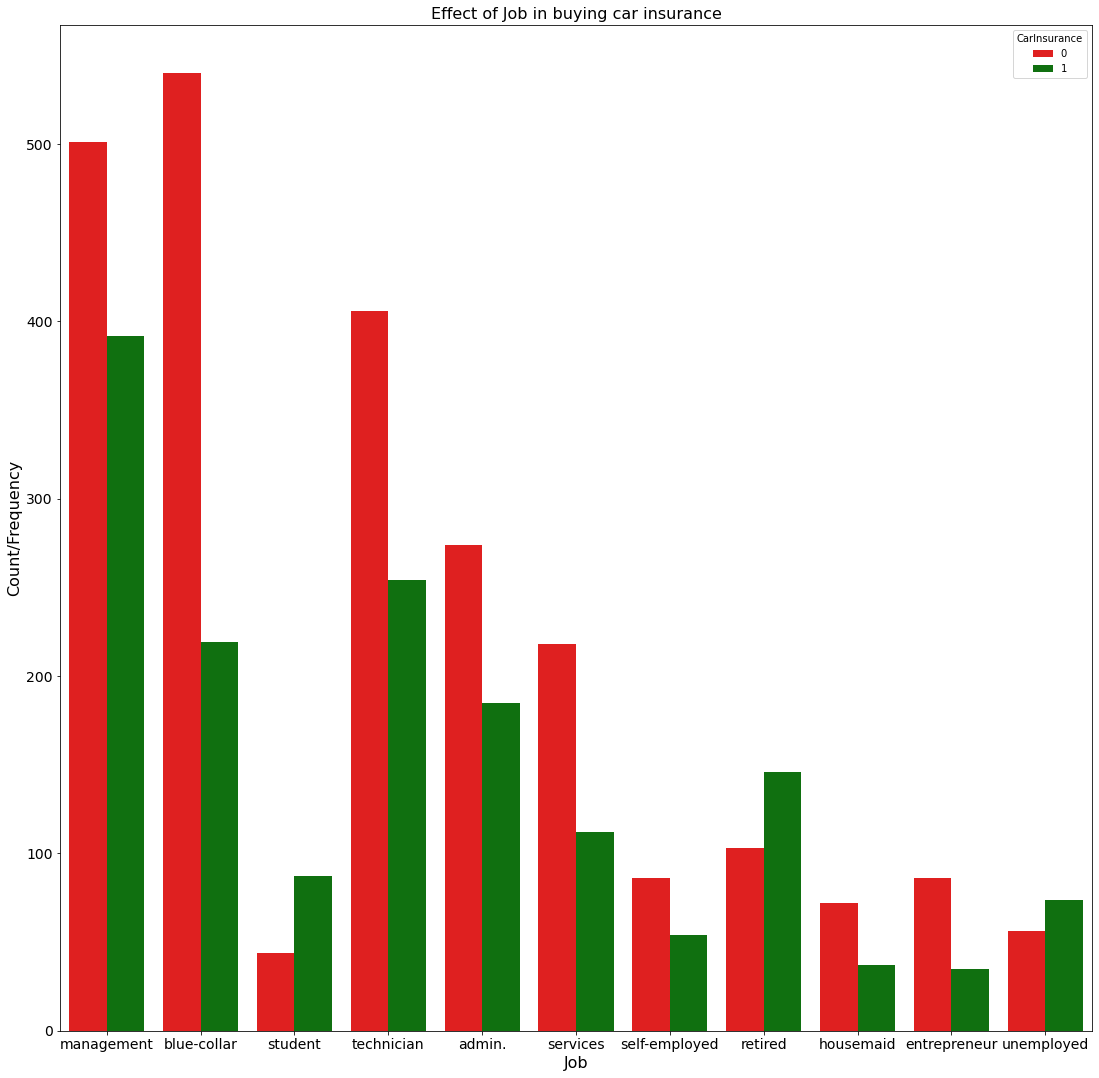

In [44]:
 feature_target_dist_plots(df, 'Job')

Obervation: Management, blue-collar, technician, and admin were the more likely job categories subscribed to the car insurance.

'Effect of Marital in buying car insurance: 0:NO , 1:YES'

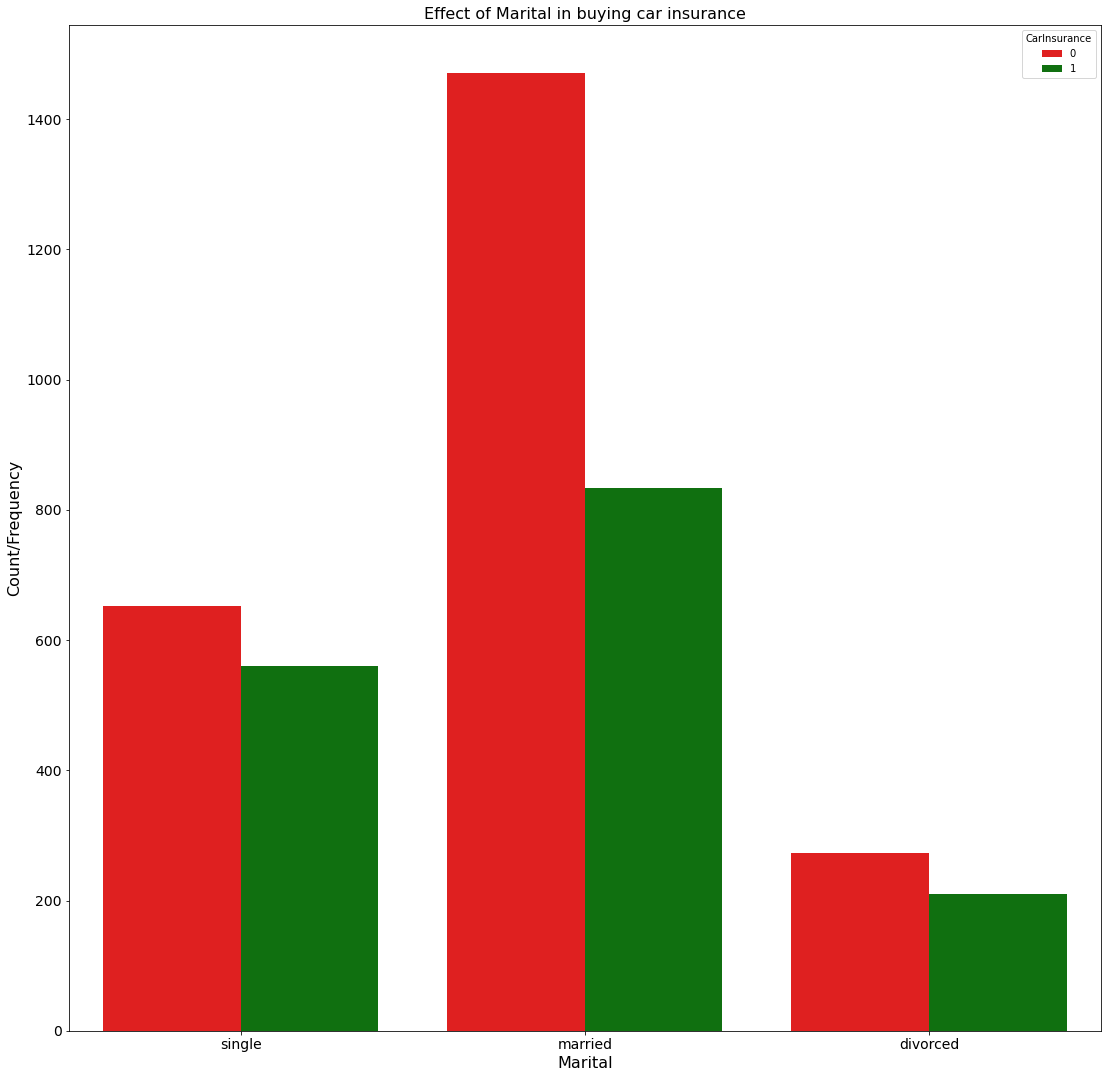

In [45]:
feature_target_dist_plots(df, 'Marital')

Obervation: Married people with marital status are the one who mostly purchased the car insurance.

'Effect of Education in buying car insurance: 0:NO , 1:YES'

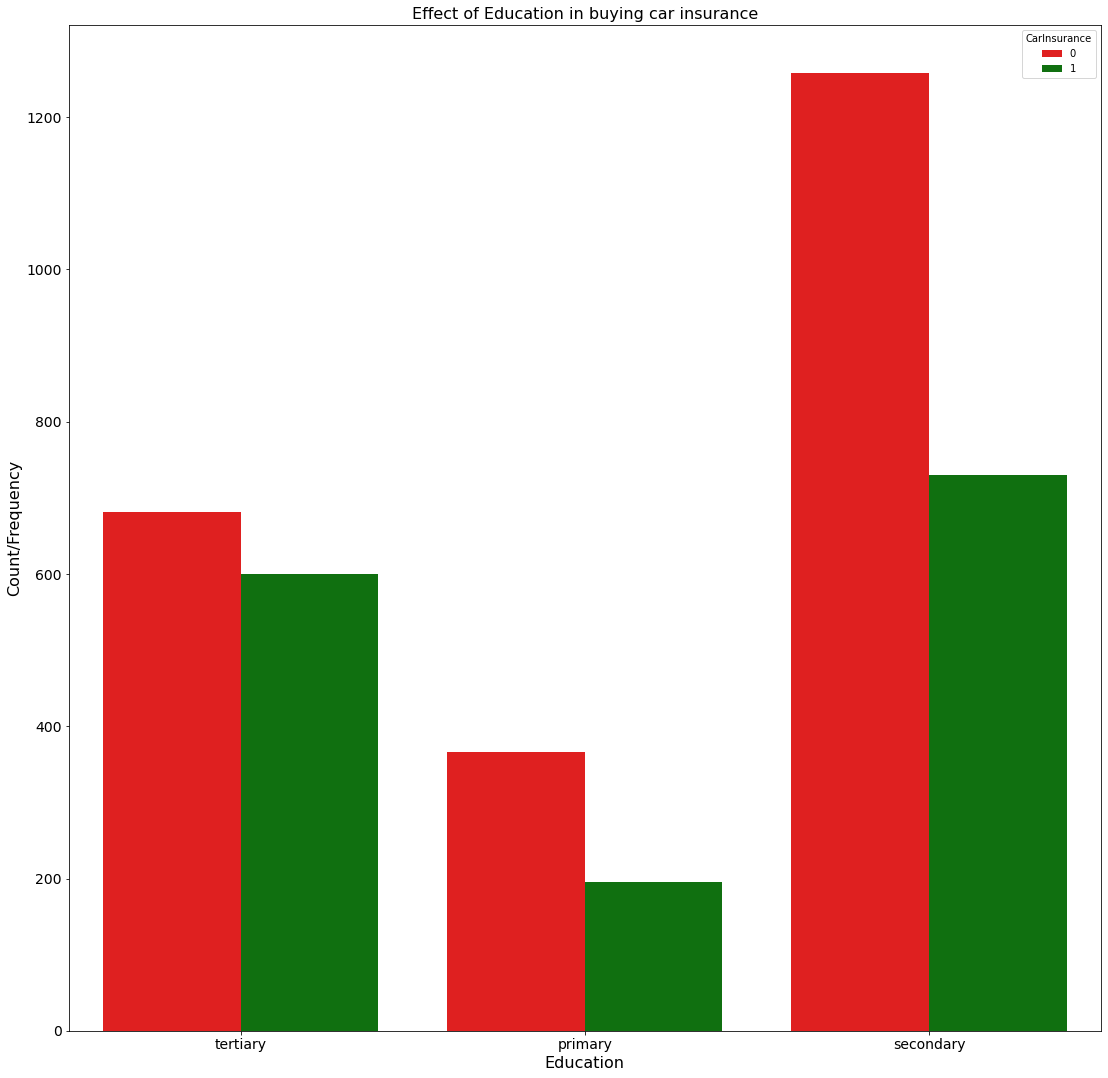

In [46]:
feature_target_dist_plots(df, 'Education')

Obervation: Tertiary and secondary educated people are the one who mostly purchased the car insurance.

'Effect of Communication in buying car insurance: 0:NO , 1:YES'

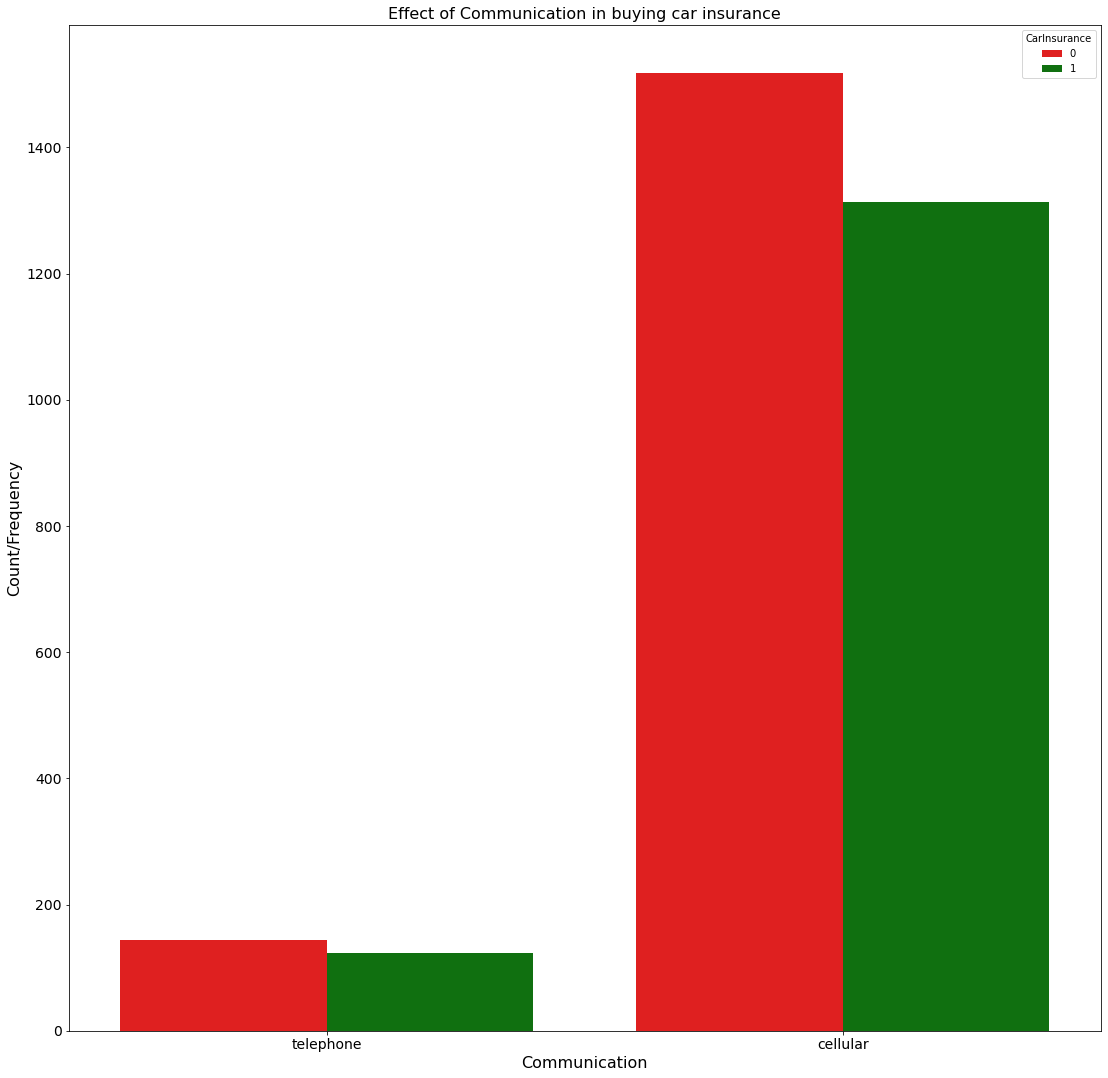

In [47]:
feature_target_dist_plots(df, 'Communication')

### Obervation: People mostly contaced on cellular were almost same in number in taking the car insurance or not.

'Effect of Outcome in buying car insurance: 0:NO , 1:YES'

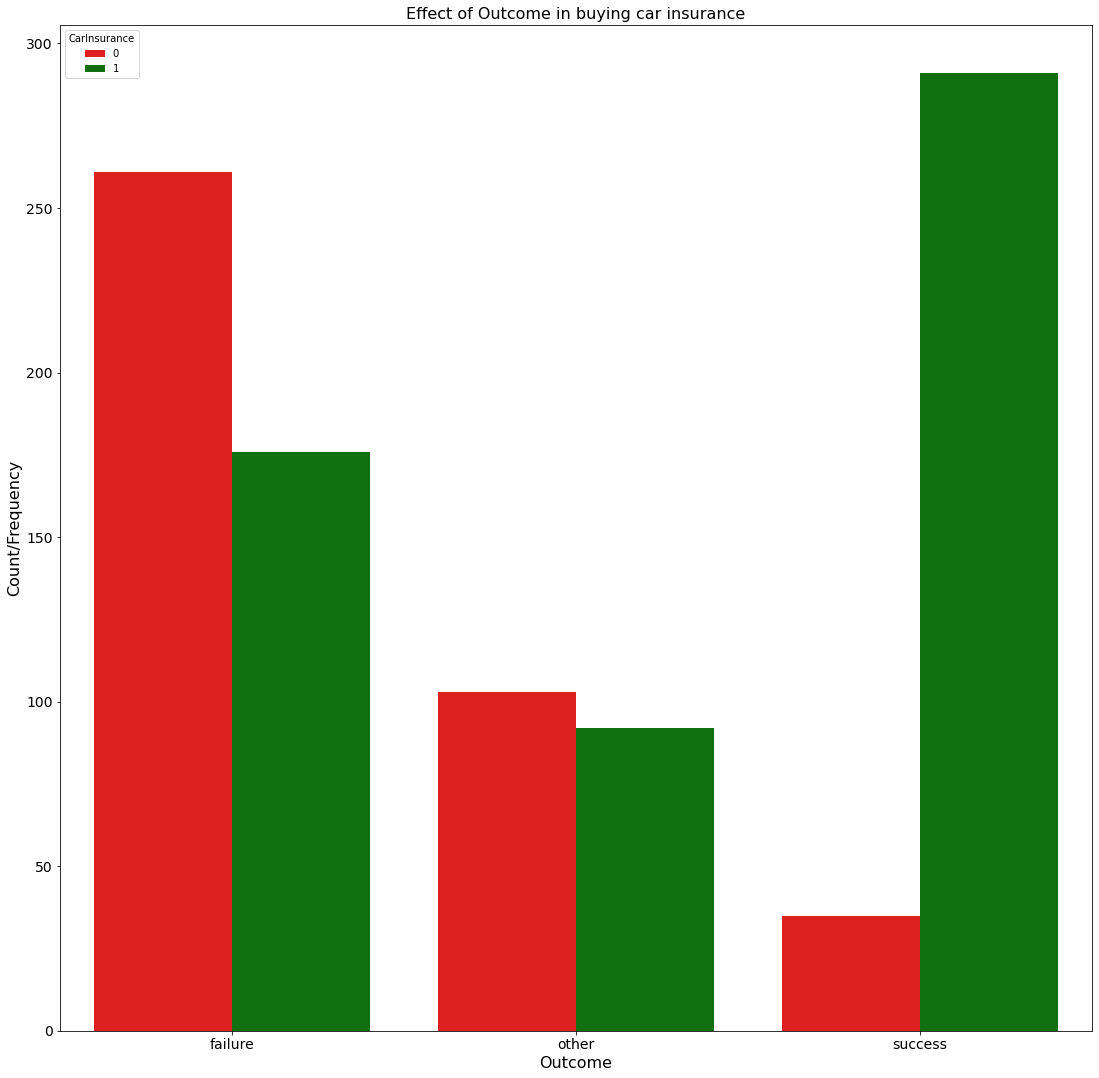

In [48]:
feature_target_dist_plots(df, 'Outcome')

Obervation: Previous campaign outcome success is also a major factor in subscribing the car insurance.

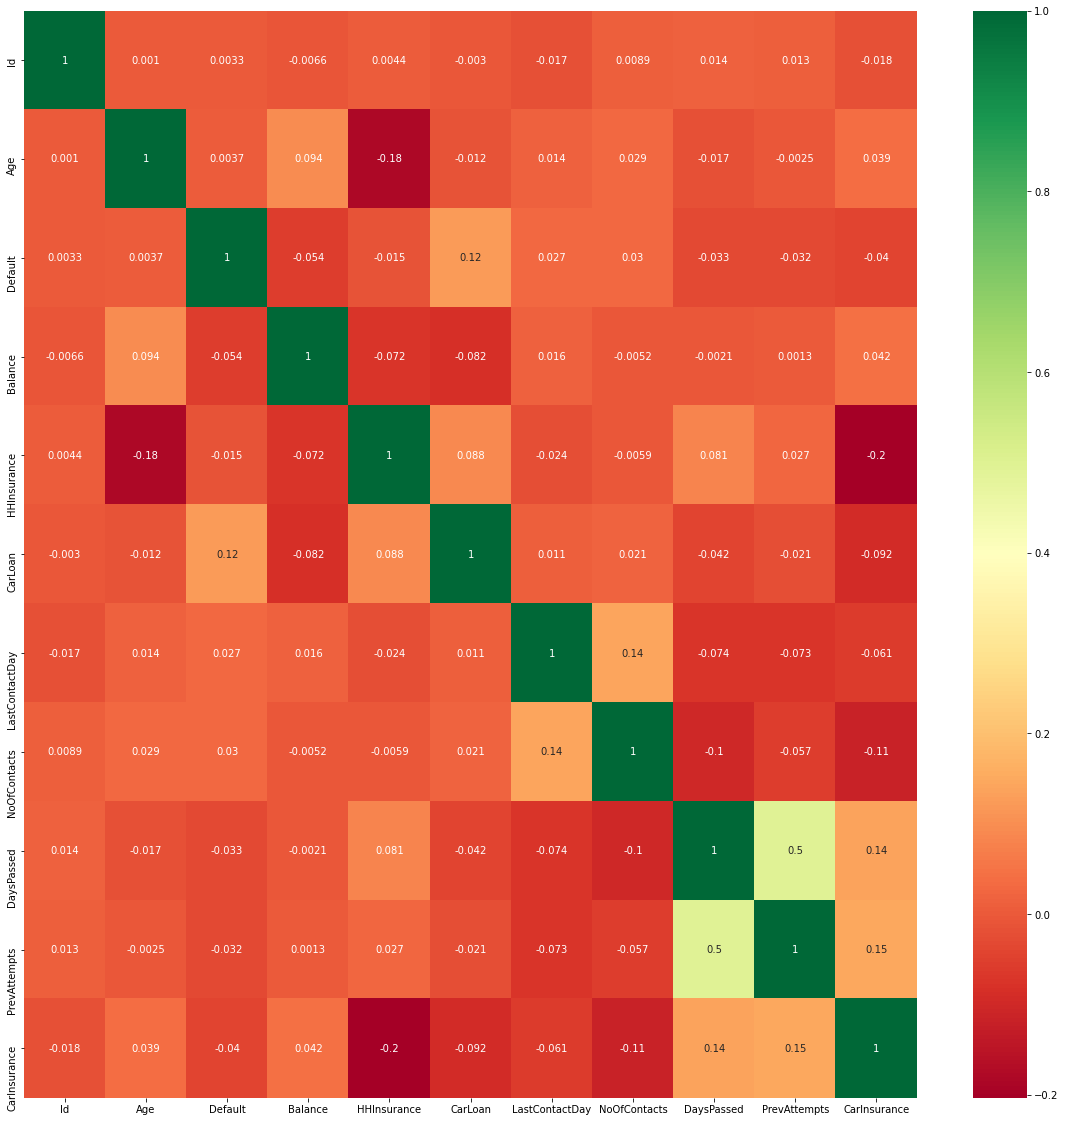

In [49]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
def impute_missing_values(df):
    df['Job'].fillna(value='missing', inplace=True)
    df['Education'].fillna(value='missing', inplace=True)
    df['Communication'].fillna(value='cellular', inplace=True)
    df['Outcome'].fillna(value='missing', inplace=True)
    return df

def encode_features(df):
    df = pd.get_dummies(df, columns = ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome'], prefix_sep = '_', drop_first = True)
    df['call_duration'] = (pd.to_datetime(df['CallEnd']) -  pd.to_datetime(df['CallStart'])).dt.total_seconds()
    df.drop(['CallStart', 'CallEnd'], axis=1, inplace=True)
    return df

In [51]:
df = impute_missing_values(df)
# check for null values
print(df.apply(lambda x: sum(x.isnull()), axis=0))

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64


In [52]:
df = encode_features(df)
df.drop(['Id'], axis=1, inplace=True)
df.head(5)
df.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_missing', 'Job_retired', 'Job_self-employed',
       'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_telephone',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep', 'Outcome_missing',
       'Outcome_other', 'Outcome_success', 'call_duration'],
      dtype='object')

## Model Prediction¶
Now it is time to start building the model

In [53]:
train_len = df.shape[0]
Y = df.CarInsurance[:train_len]
df.drop(['CarInsurance'], axis=1, inplace=True)
X = df[:train_len]

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=144)
classifier = LGBMClassifier(n_estimators=100, silent=False, random_state =94, max_depth=20,num_leaves=40,objective='binary',metrics ='auc')
model = classifier.fit(X_train, Y_train, eval_metric='auc')
test_model_predictions = model.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(test_model_predictions, name = 'Predict'), margins = True)
print("Training")
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, test_model_predictions)))
print("Precision is {0:.2f}".format(precision_score(Y_test, test_model_predictions)))
print("Recall is {0:.2f}".format(recall_score(Y_test, test_model_predictions)))
print("F1-Score is {0:.2f}".format(f1_score(Y_test, test_model_predictions)))

[LightGBM] [Info] Number of positive: 1290, number of negative: 1910
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.403125 -> initscore=-0.392461
[LightGBM] [Info] Start training from score -0.392461
Training
Accuracy is 0.84
Precision is 0.79
Recall is 0.81
F1-Score is 0.80


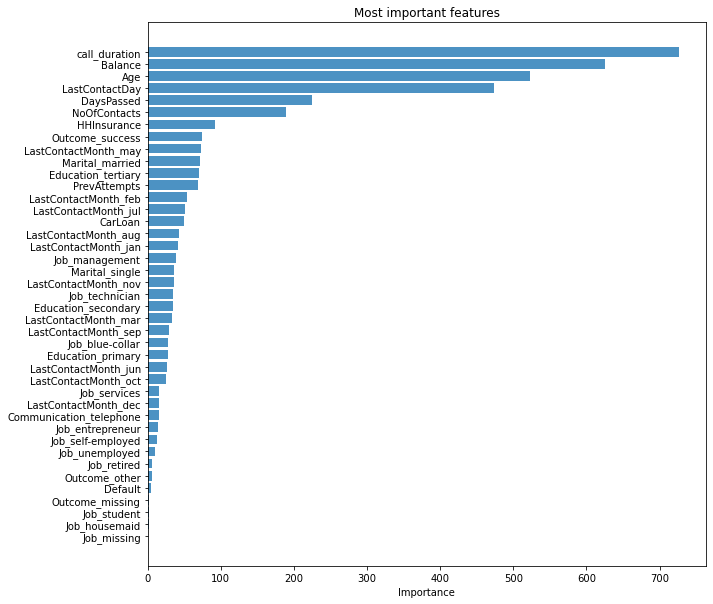

In [55]:
# Create list of top most features based on importance
feature_names = model.feature_name_
feature_imports = model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(X.shape[0], "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,10))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=10)
plt.xlabel('Importance')
plt.title('Most important features')
plt.show()

### Conclusion and Obeservations
From the plot communication distribution plot we see cellular is the most commonly used for communication and we imputed the communication feature missing values with 'Cellular'.

From the feature importance graph we see call duration is very important feature in subscribing the car insurance and we see feature 'Default' is not an important factor in making the prediction and we can drop the default feature.

Feature Elimination: to further minimize feature space, if two features are highly correlated one of the features can be dropped and this is an iterative process. Recursive Feature Elimination can be implemented for feature minimization

Predictions on test data

In [56]:
# check for null values
print(test.apply(lambda x: sum(x.isnull()), axis=0))

Id                     0
Age                    0
Job                    5
Marital                0
Education             47
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        221
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome              757
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64


In [57]:
test = impute_missing_values(test)
print(test.apply(lambda x: sum(x.isnull()), axis=0))

Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome                0
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64


In [58]:
test = encode_features(test)

In [59]:
result_df: pd.DataFrame = test[['Id']]
test.drop(['Id', 'CarInsurance'], axis=1, inplace=True)
predcitions = model.predict(test)
result_df['CarInsurance'] = np.array(predcitions)
result_df.head(5)

,Id,CarInsurance
0,4001,0
1,4002,0
2,4003,0
3,4004,0
4,4005,0


**Model 2**

In [60]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=30, criterion = "gini", min_samples_split=10)
classifier.fit(X_train, Y_train)

# performace on train data
test_model_predictions = classifier.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(test_model_predictions, name = 'Predict'), margins = True)
print("Training")
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, test_model_predictions)))
print("Precision is {0:.2f}".format(precision_score(Y_test, test_model_predictions)))
print("Recall is {0:.2f}".format(recall_score(Y_test, test_model_predictions)))
print("F1-Score is {0:.2f}".format(f1_score(Y_test, test_model_predictions)))

Training
Accuracy is 0.85
Precision is 0.81
Recall is 0.82
F1-Score is 0.82


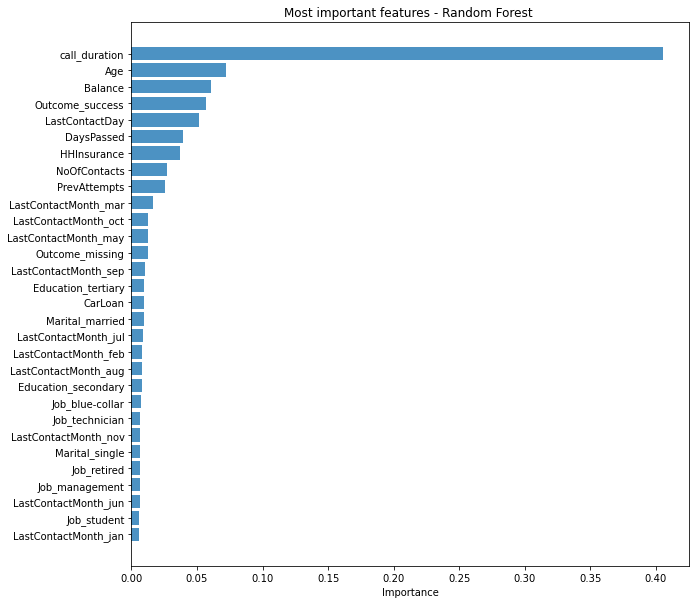

In [61]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = classifier.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(30, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,10))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=10)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()